# Python Assignment
## EEOB 546
## Author: 
### Manuela Chaves-Mejia
## Date
### Last modified: May 1, 2024
## GitHub repository
### https://github.com/chavesMM/BCB546-PythonHW_Spring2024.git
---
## Description
### This code conducts various analyses on penguin genetic and biological data, including translation, molecular weight calculation, GC content calculation, visualization of body mass, and exploration of relationships between molecular weight and GC content.
##### Please find at the end of the notebook the Python assignment details and instructions, as well as Dr. X's initial comments and pseudocode and references.

---
Workflow:
--- 
- 1. Install and load necessary packages
---
Functions to prepare data for further analysis:

- 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.
- 3. Write an alternative translation function.
- 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
- 5. Write a function that computes the GC-content of each DNA sequence.

---
MAIN: analysis of the data:
- 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
- 7. Call your functions from step 3 (or step 2, as preferred) and step 4 and fill in the new columns in the DataFrame.
- 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
a. What is the smallest penguin species? 
b. What is the geographical range of this species?
- 9. Plot a graph that shows the molecular weight as a function of GC content. 
- 10. Write the entire DataFrame to a new CSV file that includes your new columns.
- 11. BONUS: What other visualizations, functions or tasks would you do with this dataset?

---
Suplementary information:
- 12. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

---
## Dependencies
1. Matplotlib (specifically the pyplot module): plotting library for creating visualizations.
2. Seaborn: Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.
3. Pandas: provides data structures and functions to efficiently manipulate and analyze structured data.
4. Numpy: provides mathematical functions for data analysis.
5. BioPython: provides functionalities for working with biological sequences, structures, and related data.
6. SeqIO: module in BioPython that provides functions for reading and writing sequence files in various formats, such as FASTA and GenBank.
7. CodonTable: module in BioPython that provides tables of codons and their corresponding amino acids for various genetic codes.
8. Seq: class in BioPython that represents biological sequences (DNA, RNA, or protein sequences) and provides methods for sequence manipulation and analysis.
9. gc_fraction: function in BioPython that calculates the GC content (the proportion of guanine and cytosine bases) of a DNA sequence.
10. ProteinAnalysis: class in BioPython that provides methods for analyzing protein sequences, such as calculating molecular weight and amino acid composition.
---


---
### 1. Install essential programs

Refere to the Dependencies section for details on programs installed

In [1]:
# Installing essential programs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import Bio 
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils.ProtParam import ProteinAnalysis


### 2. Obtain sequences from a FASTA file

Find the Docstrings in the code below for description.

In [2]:
def get_sequences_from_file(fasta_fn):
    """
    Obtain sequences from a FASTA file.

    Parameters:
    - fasta_fn (str): The filename of the FASTA file containing sequence data.

    Returns:
    - sequence_data_dict (dict): A dictionary where keys are species names and values are corresponding DNA sequences.

    Reads a FASTA file and parses it to extract species names and their associated DNA sequences.
    Creates a dictionary where each species name is a key and its corresponding DNA sequence is the value.
    Returns the dictionary containing species names and sequences.
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict

fasta_fn = "data/penguins_cytb.fasta"
sequences = get_sequences_from_file(fasta_fn) #running the function to get the sequences
print(sequences)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

### 3. Translate DNA sequences into Aminoacids
Find the Docstrings in the code below for description.

In [3]:
def translate_function(string_nucleotides):
    """
    Translate a DNA sequence to an amino acid sequence.

    Parameters:
    - string_nucleotides (str): A string representing a DNA sequence.

    Returns:
    - aa_seq_string (str): A string representing the translated amino acid sequence.

    Translates a DNA sequence into an amino acid sequence.
    The translation is performed by iterating over the DNA sequence, grouping nucleotides into codons, 
    and looking up the corresponding amino acids in the genetic code table.
    If a stop codon is encountered, translation stops and the resulting amino acid sequence is returned.
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break  # Stop translation if a stop codon is encountered
        amino_acid = mito_table.forward_table[codon]
        aa_seq_string += amino_acid
    return aa_seq_string

translated_penguins = {}

for species, sequence in sequences.items():
    translated_penguins[species] = translate_function(sequence)

for species, translated_sequence in translated_penguins.items():
    print(species + ":", translated_sequence)


Aptenodytes forsteri: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
Aptenodytes patagonicus: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
Eudyptes chrysocome: MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFS

### 4. Alternative function to translate DNA sequences 

I will be using a dictionary comprehension approach to translate DNA sequences, which is different to using a for loop.

Despite both approaches perfom the same function, the dictionary comprehension approach provides some advantages:
- Shorter and more concise (same functionality in fewer lines of code).
- For very large dictionaries, dictionary comprehensions may have an optimized performance over for loop.

However, if you need to customize deeper your code, then using for loop would be the best option, since it allows to handle each key-value pair separately, as well as process additional or specific steps within the loop. Keeping this in mind, the dictionary comprehension would be prefered for simple transformations, and for people who is unfamiliar with dictionary comprehension.

The code lines below create the dictionary comprehension as follows: 

- First, imports the "Seq" class from Biopython, which represents a biological sequence and allows sequence manipulation and analysis.
- "{species: str(Seq(sequence).translate(table='Vertebrate Mitochondrial', to_stop=True)) for species, sequence in sequences.items()}". This dictionary comprehension iterates over the items of the "sequences" dictionary (obtained in the step #2).
- Seq(sequence). It converts the DNA sequence string into a Biopython Seq object.
- translate(table='Vertebrate Mitochondrial', to_stop=True). Translates the DNA sequence into an amino acid sequence using the specified genetic code table ('Vertebrate Mitochondrial') and stops translation at the first stop codon encountered.
- str(...): Converts the translated amino acid sequence (which is a Seq object) back to a string.

Finally, this code results in a "translated_penguins_alt" dictionary, where the keys are the species names and the values are the translated amino acid sequences.

###### Note that I change the "translated_penguins" variable from the previous step for "translated_penguins_alt" for the alternative to avoid overwriting results.

To print the translated sequences, I used a for loop that iterates over the key-value pairs in the "translated_penguins_alt" dictionary. Then printing each species name followed by its translated amino acid sequence.


In [5]:

translated_penguins_alt = {species: str(Seq(sequence).translate(table='Vertebrate Mitochondrial', to_stop=True)) for species, sequence in sequences.items()}

for species, translated_sequence in translated_penguins_alt.items():
    print(species + ":", translated_sequence) #printing the species and translated sequences as key-value pairs

Aptenodytes forsteri: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
Aptenodytes patagonicus: MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
Eudyptes chrysocome: MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFS

### 5. Molecular weight of each protein sequence

Note: this analysis uses the ProteinAnalysis class from the ProtParam module of the Bio.SeqUtils package in Biopython, suggested by Dr. X. This class is used to analyze protein sequences, such as calculating molecular weights, isoelectric points, and other properties.

In [11]:
#from Bio.SeqUtils.ProtParam import ProteinAnalysis

def calculate_molecular_weights(aa_sequences):
    """
    Calculate the molecular weights of amino acid sequences in a dictionary.
    
    Parameters:
        aa_sequences (dict): Dictionary where keys are identifiers and values are amino acid sequences.
        
    Returns:
        dict: Dictionary where keys are identifiers and values are molecular weights of the corresponding sequences.
    """
    molecular_weights = {}
  
    for identifier, sequence in aa_sequences.items():
        # Create a ProteinAnalysis object for the amino acid sequence
        protein_analysis = ProteinAnalysis(sequence)
        # Calculate the molecular weight
        molecular_weight = protein_analysis.molecular_weight()
        molecular_weights[identifier] = molecular_weight
    
    return molecular_weights


In [12]:
# Call the calculate_molecular_weights function
molecular_weights = calculate_molecular_weights(translated_penguins_alt)

# Print the result
for identifier, weight in molecular_weights.items():
    print(f"{identifier}: Molecular Weight = {weight}")


Aptenodytes forsteri: Molecular Weight = 42459.602100000004
Aptenodytes patagonicus: Molecular Weight = 42563.70669999999
Eudyptes chrysocome: Molecular Weight = 42475.5753
Eudyptes chrysolophus: Molecular Weight = 42445.54929999999
Eudyptes sclateri: Molecular Weight = 42475.5753
Eudyptula minor: Molecular Weight = 42491.64080000001
Pygoscelis adeliae: Molecular Weight = 42458.61400000001
Pygoscelis antarctica: Molecular Weight = 42404.54230000001
Pygoscelis papua: Molecular Weight = 42595.87590000001
Spheniscus demersus: Molecular Weight = 42431.54900000002
Spheniscus humboldti: Molecular Weight = 42399.55200000001
Spheniscus magellanicus: Molecular Weight = 42459.60210000002


### 6. GC content analysis

The GC content is calculated by dividing the number of G and C nucleotides by the total number of base pairs in the sequence, and then multiplying by 100%. On step 1, I created the dictionary for the DNA fasta file, called "sequences"; that is the dictionary I will call after the function is defined to obtain the GC content.

The function to calculate the GC content of each DNA sequence takes a dictionary dna_sequences as input, where keys are identifiers (sequence names) and values are DNA sequences. It calculates the GC content of each DNA sequence and returns a dictionary "gc_contents", where keys are the same identifiers and values are the GC content percentages of the corresponding DNA sequences.



In [8]:
def calculate_gc_content(dna_sequences):
    """
    Calculate the GC content of DNA sequences in a dictionary.
    
    Parameters:
        dna_sequences (dict): Dictionary where keys are identifiers and values are DNA sequences.
        
    Returns:
        dict: Dictionary where keys are identifiers and values are GC content of the corresponding DNA sequences.
    """
    gc_contents = {}
    for identifier, sequence in dna_sequences.items():
        gc_count = sequence.count('G') + sequence.count('C')
        gc_content = gc_count / len(sequence) * 100
        gc_contents[identifier] = gc_content
    return gc_contents


In [9]:
# Call the calculate_gc_content function
gc_contents = calculate_gc_content(sequences)

# Print the result
for identifier, gc_count in gc_contents.items():
    print(f"{identifier}: GC Content = {gc_count}")


Aptenodytes forsteri: GC Content = 48.38145231846019
Aptenodytes patagonicus: GC Content = 49.69378827646544
Eudyptes chrysocome: GC Content = 51.181102362204726
Eudyptes chrysolophus: GC Content = 50.91863517060368
Eudyptes sclateri: GC Content = 50.83114610673666
Eudyptula minor: GC Content = 49.256342957130364
Pygoscelis adeliae: GC Content = 49.08136482939632
Pygoscelis antarctica: GC Content = 47.76902887139108
Pygoscelis papua: GC Content = 47.15660542432196
Spheniscus demersus: GC Content = 48.29396325459317
Spheniscus humboldti: GC Content = 49.256342957130364
Spheniscus magellanicus: GC Content = 48.20647419072616



###   MAIN   ###

###  6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.

In this code:
- We import the necessary modules including pandas, numpy, and ProteinAnalysis from Bio.SeqUtils.ProtParam (refer to Dependencies).
- We read the penguins DataFrame from the CSV file "penguins_mass.csv" using pd.read_csv().
- We use the assign() method to add two new columns named 'Molecular_Weight' and 'GC_Content' to the DataFrame penguins_df and initialize their values to NaN using np.nan.
- Finally, we display the updated DataFrame penguins_df.
- After running this code, penguins_df will have two new columns ('Molecular_Weight' and 'GC_Content') with NaN values. You can then fill in these columns with the actual molecular weights and GC content calculated from the corresponding sequences.


In [13]:
#Load mass file
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 

#Add new columns for molecular weight and GC content with NaN values
penguins_df = penguins_df.assign(Molecular_Weight=np.nan, GC_Content=np.nan)

#Outputting the result
print(penguins_df)

                    species   mass  Molecular_Weight  GC_Content
0      Aptenodytes forsteri  28.00               NaN         NaN
1   Aptenodytes patagonicus  13.40               NaN         NaN
2       Eudyptes chrysocome   2.80               NaN         NaN
3     Eudyptes chrysolophus   4.50               NaN         NaN
4         Eudyptes sclateri   4.25               NaN         NaN
5           Eudyptula minor   1.60               NaN         NaN
6        Pygoscelis adeliae   4.60               NaN         NaN
7     Pygoscelis antarctica   4.10               NaN         NaN
8          Pygoscelis papua   6.10               NaN         NaN
9       Spheniscus demersus   3.20               NaN         NaN
10     Spheniscus humboldti   4.75               NaN         NaN
11  Spheniscus magellanicus   3.40               NaN         NaN


### 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.

In this code:

* We import the necessary modules.
* We iterate over each species and its DNA sequence in the sequences dictionary.
* For each sequence, we translate it into an amino acid sequence using the provided function.
* We calculate the molecular weight of the translated amino acid sequence using the provided function.
* We calculate the GC content of the DNA sequence.
* We append the calculated molecular weight and GC content to separate lists.
* Finally, we add the lists as new columns to the DataFrame penguins_df and display the updated DataFrame. 

In [16]:
# Iterate over each species and its DNA sequence in the sequences dictionary
for species, seq in sequences.items():
    # Translate the DNA sequence to an amino acid sequence
    aa_seq = translate_function(seq)

    # Initialize a dictionary to store translated amino acid sequences for each species
    translated_penguins = {}

    # Iterate over each species and its DNA sequence again
    for species, sequence in sequences.items():
        # Translate the DNA sequence to an amino acid sequence and store it in the dictionary
        translated_penguins[species] = translate_function(sequence)

    # Calculate the molecular weights of the translated amino acid sequences
    mol_weight = calculate_molecular_weights(translated_penguins)
    
    # Calculate the GC content of the DNA sequences
    gc_content = calculate_gc_content(sequences)

    # Add the calculated molecular weights and GC content to the penguins DataFrame
    penguins_df['Molecular_Weight'] = penguins_df['species'].map(mol_weight)
    penguins_df['GC_Content'] = penguins_df['species'].map(gc_content)

# Print the updated penguins DataFrame
print(penguins_df)

                    species   mass  Molecular_Weight  GC_Content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


###  8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 

1. What is the smallest penguin species? 
Eudyptula minor is the smallest species according to its adult body mass of 1.6kg.
2. What is the geographical range of this species?
This species extends primarily across parts of Australia and New Zealand.

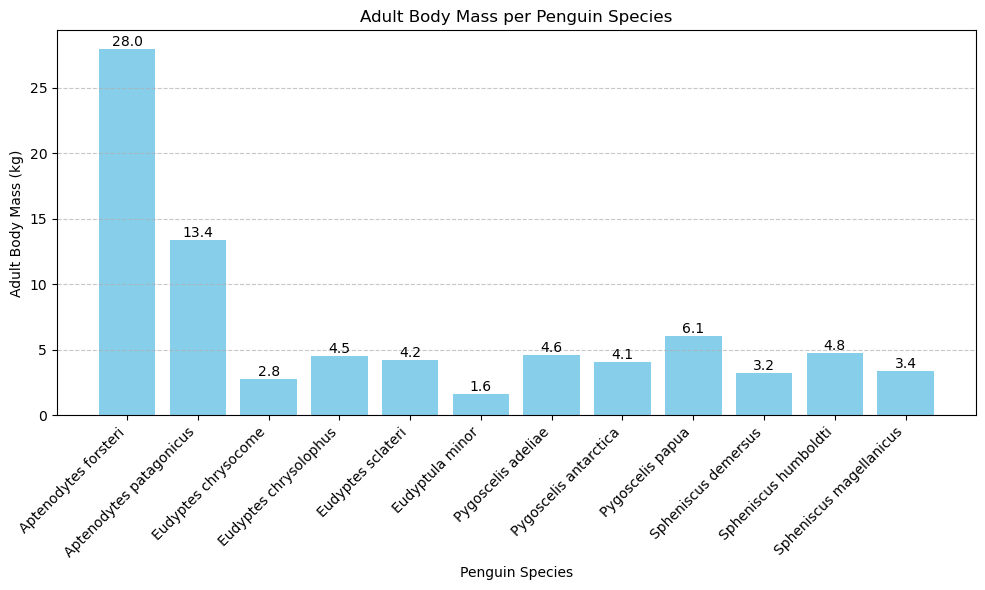

In [17]:

species = penguins_df['species']
body_mass = penguins_df['mass']

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(species, body_mass, color='skyblue')

# Adding labels and title
plt.xlabel('Penguin Species')
plt.ylabel('Adult Body Mass (kg)')
plt.title('Adult Body Mass per Penguin Species')

bars = plt.bar(species, body_mass, color='skyblue')

# Adding exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, round(height, 1), ha='center', va='bottom')

# Displaying the plot
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 9. Plot a graph that shows the molecular weight as a function of GC content. 

For this plot, I am adding a regression line model to observe if there is any correlation between molecular weight as GC content. We can observe that there is no correlation between the two variables, hence the molecular weight does not depend on GC content.

R-squared: 0.01092475580051505
LinregressResult(slope=-4.661826269458818, intercept=42700.99872138546, rvalue=-0.10452155663074986, pvalue=0.7464891027679013, stderr=14.027002737625562, intercept_stderr=689.9114335622899)


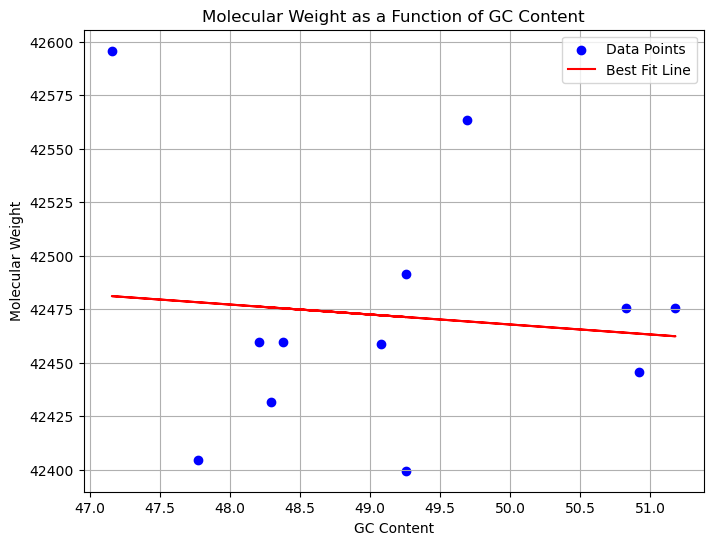

In [18]:
from scipy.stats import linregress
# Sample data
species = penguins_df['species']
GC_content = penguins_df['GC_Content']
mol_weight = penguins_df['Molecular_Weight']
mass = penguins_df['mass']

# Perform linear regression
equation = slope, intercept, r_value, p_value, std_err = linregress(GC_content, mol_weight)

# Calculate the line of best fit
line = slope * np.array(GC_content) + intercept

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(GC_content, mol_weight, color='blue', label='Data Points')
plt.plot(GC_content, line, color='red', label='Best Fit Line')

# Add labels and title
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight as a Function of GC Content')
plt.legend()

# Show the plot & print regression equation values
print(f"R-squared: {r_value**2}")
print(equation)
plt.grid(True)
plt.show()

# Additional visualizations

### 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun.
 
 I decided to make the following visualizations for mass, molecular weight and GC content variables per species:
 - Individual density plot. We can observe the mean distribution of the data for each variable.
 - Box plot. Statistical observations can be infered from this plot, as an example, mass and molecular weight variables seem to contain outliers.
 - Correlation heatmap. Where dark blue means low correlation between variables (low values), while red color means high correlation between variables (high values).

 Note: Since the values for the variables differ in scale, I ploted individually for each variable to be able observe the impact of the analysis.
 

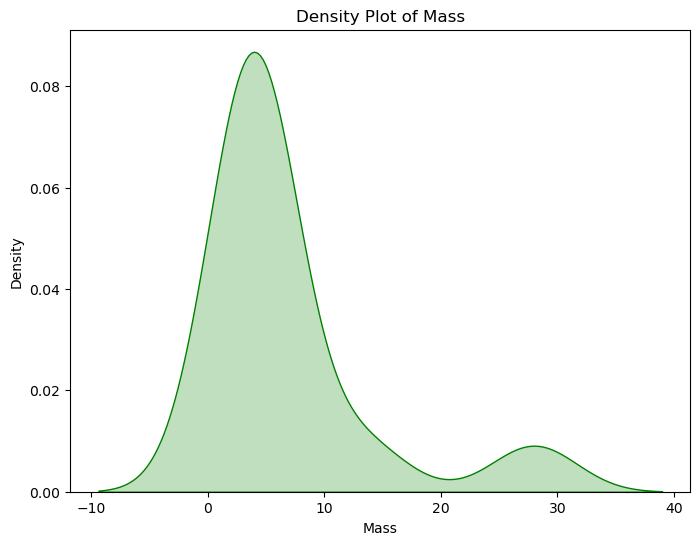

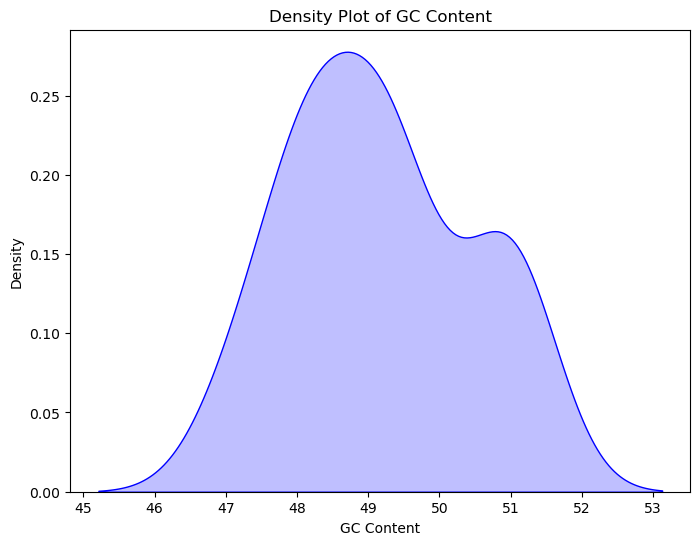

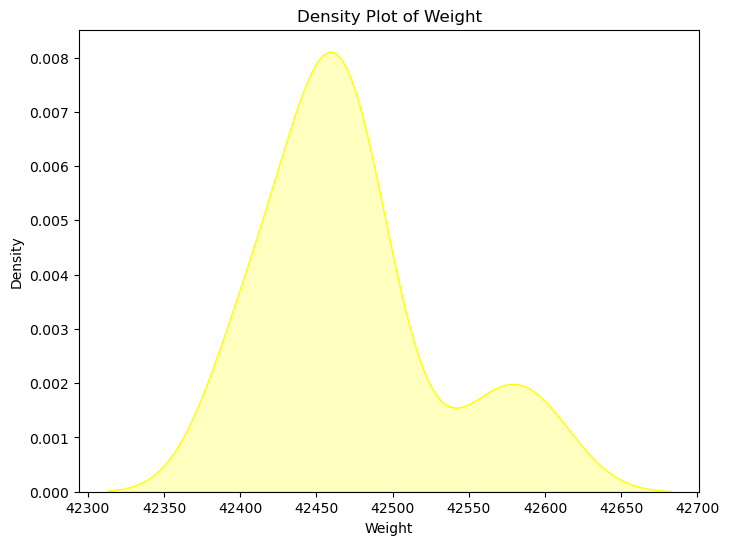

In [19]:
# Density plot for 'mass'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=penguins_df['mass'], bw_method=0.5, fill=True, color = "green")
plt.xlabel('Mass')
plt.ylabel('Density')
plt.title('Density Plot of Mass')
plt.show()

# Density plot for 'gc_content'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=penguins_df['GC_Content'], bw_method=0.5, fill=True, color = "blue")
plt.xlabel('GC Content')
plt.ylabel('Density')
plt.title('Density Plot of GC Content')
plt.show()

# Density plot for 'weight'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=penguins_df['Molecular_Weight'], bw_method=0.5, fill=True, color = "yellow")
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Density Plot of Weight')
plt.show()



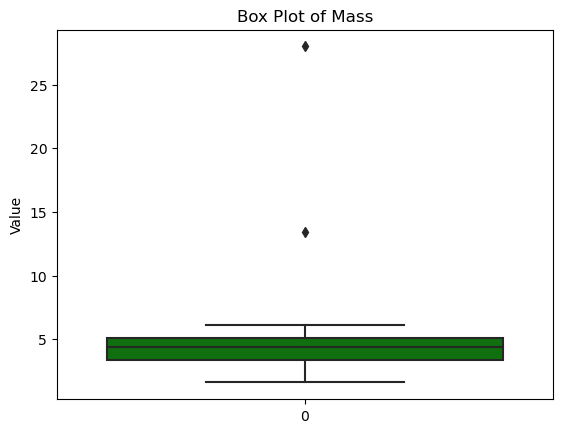

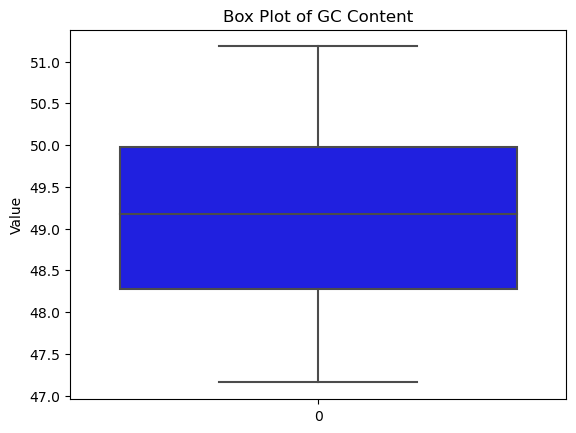

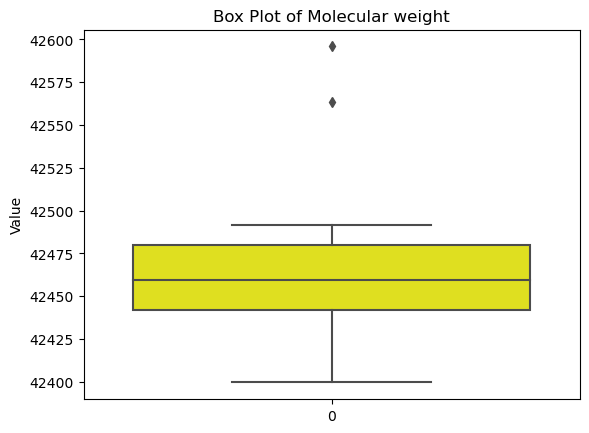

In [20]:
# Box plots
sns.boxplot(data=penguins_df['mass'], color = "green")
plt.ylabel('Value')
plt.title('Box Plot of Mass')
plt.show()

sns.boxplot(data=penguins_df['GC_Content'], color = "blue")
plt.ylabel('Value')
plt.title('Box Plot of GC Content')
plt.show()

sns.boxplot(data=penguins_df['Molecular_Weight'], color = "yellow")
plt.ylabel('Value')
plt.title('Box Plot of Molecular weight')
plt.show()


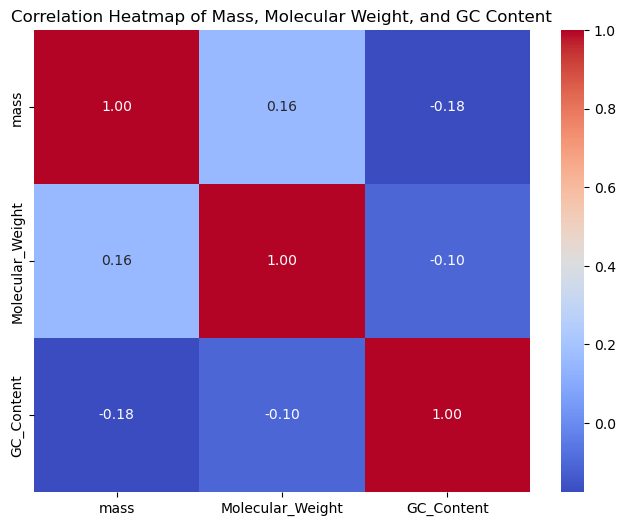

In [21]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = penguins_df[['mass', 'Molecular_Weight', 'GC_Content']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Mass, Molecular Weight, and GC Content')
plt.show()



# 10. Write the entire DataFrame to a new CSV file that includes your new columns.

In [22]:
# save new data frame
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)  # Set index=False if you don't want to save the index
# to make sure it is save, load and print the new data frame
df = pd.read_csv('penguins_mass_cytb.csv')
print(df)

                    species   mass  Molecular_Weight  GC_Content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


# SUPLEMMENTARY INFORMATION

#### BCB 546X: Python Assignment Details and Instructions#
##### Please find below the Python assignment details and instructions, as well as Dr. X's initial comments and pseudocode and references.

---
Additional Instructions:
--- 
* Do all of this in a Jupyter notebook and push it to a GitHub repository.
* Your repository should not contain any files other than those associated with this assignment. 
* Read all comments carefully and answer the questions by including information in your Jupyter notebook.
* Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.
* Be sure to cite (by providing URLs or other appropriate citations) information appropriately in your documented notebook.
* Commit and push your completed work in the Jupyter notebook to your repository.
* Submit the URL to your git repository via Canvas by the end of the day on May 1, 2024.

---
Dr. X's initial comments and pseudocode:
--- 

######################## Python Translate Script ########################

### Here's the start of our Python script. Thanks for completing it for me! - Dr. X

#### IMPORTANT: install BioPython so that this will work
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

### FUNCTIONS #

### 1 #
#### Dr. X: "This gets sequences. Please properly document this function in the Jupyter notebook. Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments".

def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict) #

### 2 #
######################## YOUR STRING-TRANSLATE FUNCTION ########################

#### Dr. X: "Write a function that translates sequences. All sequences start at codon position 1. Complete a function that translates using a loop over the string of nucleotides. Here is  some pseudo-code and suggestions Feel free to change the function and variable names

def translate_function(string_nucleotides): 
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#### IMPORTANT: if the sequence has a stop codon at the end, you should leave it off

#### Dr. X: "This is how you can retrieve the amino acid:" 

mito_table.forward_table[codon]
add the aa to aa_seq_string
return(aa_seq_string)

### 3 #
######################## YOUR ALTERNATIVE FUNCTION ########################
#### Dr. X: "Is there a better way to write the translation function? (Hint: yes there is). Perhaps using available BioPython library utilities? Please also write this function.


### 4 #
######################## YOUR COUNT AA ANALYSIS FUNCTION ########################
#### Dr. X:"Write a function that calculates the molecular weight of each amino acid sequence. For this, you can use some BioPython functions. I think you can use the ProtParam module. For more info, check this out: http://biopython.org/wiki/ProtParam. So you should import the following before defining your function":

from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
#### I think the ProtParam functions may require aa_seq to be a string. It may not work if the amino acid sequence has stop codons. 
Run the ProteinAnalysis() function on aa_seq
return the molecular weight

### 5 #
######################## YOUR GC CONTENT ANALYSIS FUNCTION ########################
#### Dr. X:"Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.


---
###   MAIN   ###

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

### 6 #
#### Dr. X:"Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content. Set the value to 'NaN' to indicate that these cells are currently empty".

### 7 #
#### Dr. X:"Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and add those data to DataFrame"

for key, value in cytb_seqs.items():
    aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
    get the molecular weight of aa_seq
    get the GC content of the DNA sequence
    fill in empty cells in DF that you created above

### 8 #
#### Dr. X:"Plot a bar-chart of the mass with the x-axes labeled with species names.
    *Q1* What is the smallest penguin species? 
    *Q2* What is the geographical range of this species?

### 9 #
#### Dr. X:"Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)".

### 10 #
#### Dr. X:"Save the new DataFrame to a file called: "penguins_mass_cytb.csv""

### 11 - BONUS #
#### What else can we do with this dataset in Python? 
#### Add functions or anything that might be interesting and fun. (optional)

---
References:
--- 
* https://eeob-biodata.github.io/BCB546X-python/
* https://www.geeksforgeeks.org/dna-protein-python-3/?ref=gcse
* https://www.w3schools.com/python/ref_dictionary_items.asp
* https://www.datacamp.com/tutorial/python-dictionary-comprehension
* https://www.w3schools.com/python/matplotlib_plotting.asp